In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter

### Perform PDFT Calculation. 

Code should run as it is but for idential calculations increase to grid size to: [7,12,12]

In [3]:
a = 4.522/2
#Nuclear charge for fragments A and B
Za, Zb = 4,4
#Set polarization 1-Unpolarized, 2-Polarized
pol = 1
#Fragment a electrons [alpha, beta]
Nmo_a = [[2]] #Number of molecular orbitals to calculate
N_a   = [[4]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[2]]
N_b   = [[4]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[4]]
N_m   = [[8]]


#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(15/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, { "kinetic_part_type" : "inversion",
                                                                          "ab_sym"            : True,
                                                                          "ens_spin_sym"      : False})
#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m, {"tol_orbital" : 1e-10})
part.inverter = Inverter(grid, mol_solver, {"invert_type"    : "wuyang", 
                                            "ab_sym"         : True,
                                            "ens_spin_sym"   : False,
                                            "tol_lin_solver" : 1e-3,
                                            "tol_invert"     : 1e-9,
                                            "res_factor"     : 0,
                                           })

print("\n ----------DOING ISOLATED CALCULATION ----------\n")

part.optPartition.isolated = True
part.scf({"disp"  : False,
          "alpha" : [0.6],
          "e_tol" : 1e-12})

D0_frag_a = part.KSa.n.copy()
D0_frag_b = part.KSa.n.copy()

part.optPartition.isolated   = False


print("\n ----------DOING VP CALCULATION ----------\n")

part.scf({"disp"       : True,
          "alpha"      : [0.3],
          "max_iter"   : 200,
          "e_tol"      : 1e-9,
          "continuing" : True, 
          "iterative"  : False})

#Store full densities under the presence of vp.
Dvp_frag_a = part.KSa.n.copy()
Dvp_frag_b = part.KSb.n.copy()



 ----------DOING ISOLATED CALCULATION ----------


 ----------DOING VP CALCULATION ----------

                Total Energy ( a.u.)                               Inversion                

                __________________                ____________________________________     

Iteration         A              B                  iters      optimality        res       

___________________________________________________________________________________________ 

    1           -14.42809       -14.42809             8       +1.379e-10      +1.000e+00
    2           -14.42960       -14.42960             5       +8.512e-09      +1.552e-03
    3           -14.45502       -14.45502             6       +2.220e-10      +1.779e-03
    4           -14.43384       -14.43384             6       +6.838e-10      +1.846e-03
    5           -14.46250       -14.46250             5       +6.744e-09      +1.521e-03
    6           -14.43764       -14.43764             5       +1.292e-09      +1.032e

---
### Generate Figure 9. Parititon Potential. 

(-5.0, 5.0)

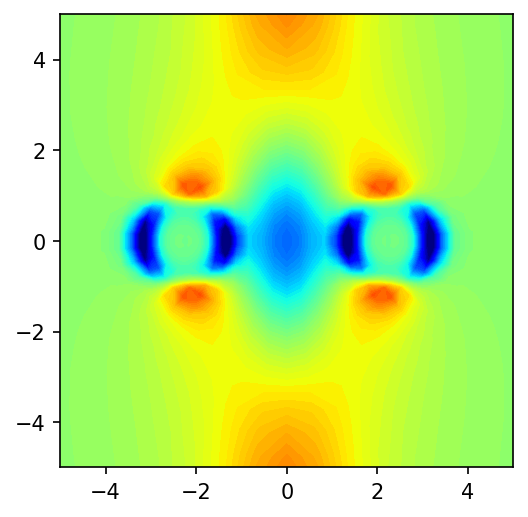

In [26]:
full, x,y = grid.plotter(part.V.vp[:,0])
fig, ax = plt.subplots(dpi=150)

plot = ax.contourf(x,y,full, levels=100, cmap="jet", vmin=-0.3, vmax=0.3)

ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# fig.colorbar(plot) 

---
### Generate Figure 9. Difference between Fragment Density and Isolated Atomic Density. 

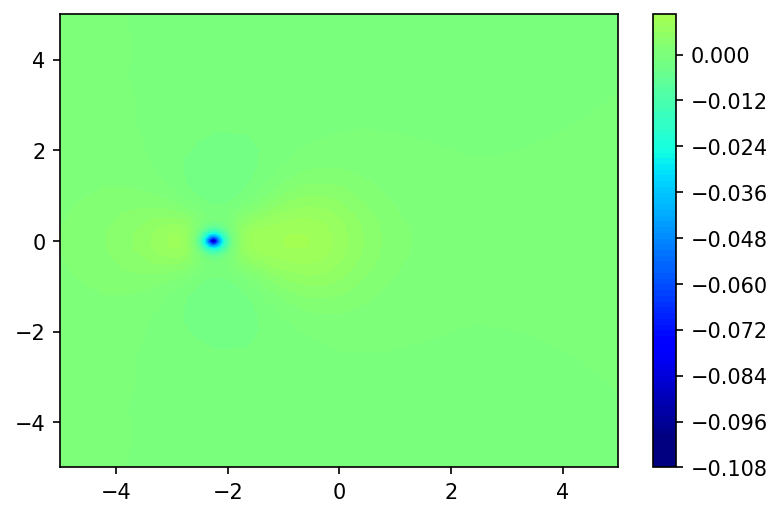

In [18]:

D_grid, x, y = grid.plotter(D0_frag_a[:,0])
D_vp_grid, _, _ = grid.plotter(Dvp_frag_a[:,0])

fig, ax = plt.subplots(dpi=150)

plot = ax.contourf(x,y, D_vp_grid - D_grid, levels=100, cmap="jet", vmin=-0.1, vmax=0.1)

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

fig.colorbar(plot)
# plt.show()

---
### Generate Figure 11. Components of the Partition Potential

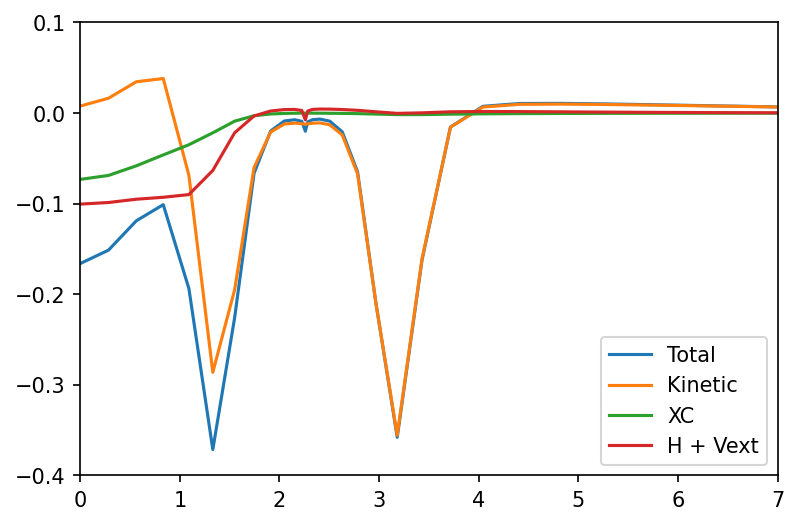

In [20]:
x_axis, vp      = grid.axis_plot(part.V.vp[:,0])
x_axis, vp_kin  = grid.axis_plot(part.V.vp_kin[:,0])
x_axis, vp_xc   = grid.axis_plot(part.V.vp_x[:,0] + part.V.vp_c[:,0] )
x_axis, vp_hext = grid.axis_plot( part.V.vp_h[:,0] + part.V.vp_pot[:,0])

fig, ax = plt.subplots(dpi=150)

ax.plot(x_axis, vp, label='Total')
ax.plot(x_axis, vp_kin, label='Kinetic')
ax.plot(x_axis, vp_xc, label='XC')
ax.plot(x_axis, vp_hext, label="H + Vext")

ax.set_xlim(0,7)
ax.set_ylim(-0.4, 0.1)

ax.legend()

---
### Generate Table 9. Energies and Components of Ep, in atomic Units

In [23]:
values = {}
for i in part.E.__dict__:
    if i.startswith("__") is False:
        values.update({i : getattr(part.E, i)})
values

{'Ea': -14.433811883813489,
 'Eb': -14.433811883813489,
 'Ef': -28.867623767626977,
 'Tsf': 28.487352625639495,
 'Eksf': array([[-16.19672859]]),
 'Enucf': -66.57834283341668,
 'Exf': -4.571341327737421,
 'Ecf': -0.44814899448127493,
 'Ehf': 14.242856762368909,
 'Vhxcf': 21.885015561062694,
 'Ep': -3.57706255042463,
 'Ep_pot': -7.123387350234733,
 'Ep_kin': 0.06063315986526163,
 'Ep_hxc': 3.485691639944841,
 'Et': -32.44468631805161,
 'Vnn': 3.5382574082264484,
 'E': -28.90642890982516,
 'evals_a': array([], dtype=float64),
 'evals_b': array([], dtype=float64),
 'Ep_h': 3.533885468919255,
 'Ep_x': -0.04305062833291373,
 'Ep_c': -0.005143200641500312}